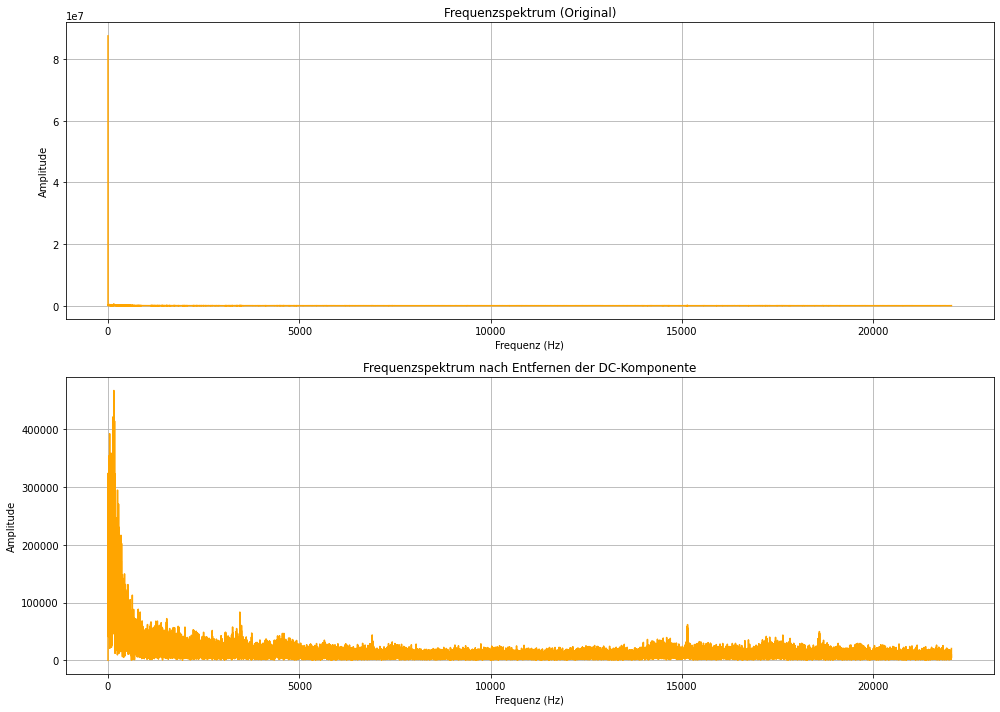

Dominante Frequenz (Original): 0.00 Hz
Dominante Frequenz (nach Entfernen der DC-Komponente): 153.05 Hz


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# WAV-Datei laden
file_path = 'adc_data.wav'
sample_rate, data = wavfile.read(file_path)

# Falls das Signal stereo ist, auf mono umstellen
if data.ndim > 1:
    data = data.mean(axis=1)

# Fourier-Transformation durchführen
fft_data = np.fft.fft(data)
frequencies = np.fft.fftfreq(len(fft_data), 1 / sample_rate)
magnitudes = np.abs(fft_data)

# Positive Frequenzen extrahieren
positive_freqs = frequencies[:len(frequencies) // 2]
positive_magnitudes = magnitudes[:len(magnitudes) // 2]

# Dominante Frequenz ermitteln
dominant_frequency = positive_freqs[np.argmax(positive_magnitudes)]

# DC-Komponente entfernen
data_detrended = data - np.mean(data)
fft_data_detrended = np.fft.fft(data_detrended)
magnitudes_detrended = np.abs(fft_data_detrended)
positive_magnitudes_detrended = magnitudes_detrended[:len(magnitudes_detrended) // 2]
new_dominant_frequency = positive_freqs[np.argmax(positive_magnitudes_detrended)]

# Plots erstellen
plt.figure(figsize=(14, 10))

# Originales Frequenzspektrum
plt.subplot(211)
plt.plot(positive_freqs, positive_magnitudes, color='orange')
plt.title('Frequenzspektrum (Original)')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Amplitude')
plt.grid()

# Frequenzspektrum nach Entfernen der DC-Komponente
plt.subplot(212)
plt.plot(positive_freqs, positive_magnitudes_detrended, color='orange')
plt.title('Frequenzspektrum nach Entfernen der DC-Komponente')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Amplitude')
plt.grid()

plt.tight_layout()
plt.show()

# Ergebnisse anzeigen
print(f"Dominante Frequenz (Original): {dominant_frequency:.2f} Hz")
print(f"Dominante Frequenz (nach Entfernen der DC-Komponente): {new_dominant_frequency:.2f} Hz")
